<a href="https://colab.research.google.com/github/Narendraiitg/Salary-V-S-Purchase-Classification-Using-SVMSVM/blob/main/Salary_Age__V_S_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the usful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the datasets

df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
# Checking the shape of data frame
df.shape

(400, 5)

In [3]:
# Spliting the data into dependent and independent variable
X = df.iloc[:, [2,3]]
Y = df.iloc[:, 4]

In [4]:
X.head()


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [5]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [6]:
# Splitting the dataset into the Training and Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [7]:
print("Training data : ",X_Train.shape)
print("Test data : ",X_Test.shape)

Training data :  (300, 2)
Test data :  (100, 2)


In [8]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

**Applying the SVM Algorithm**

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0) # kernel used here is linear
classifier.fit(X_Train, Y_Train) # Fitting the model on training sets

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

In [10]:
print(Y_Pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [11]:
# Checking the accuracy of prediction
from sklearn import metrics
print('Accuracy Score: with linear kernel')

print(metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy Score: with linear kernel
0.9


From above we can see that our model  is 90 % accurate for predicting the test data using linear kernel

**Let see what happen when we change the kernel from linear to Gaussion (radial basis function that is RBF)**

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf') # Using the rbf kernel instead of linear
classifier.fit(X_Train, Y_Train) # Training our model 

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)

# Checking the accuracy of the model
print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))


Accuracy Score: with default rbf kernel
0.93


From above we can see that we got 93 % of accuracy by using gaussion kernel instead of linear kernel

**Let see what happen when we change the kernel to polynomial**

In [15]:
svc=SVC(kernel='poly', degree = 4) # Using the Polynomial kernel of degree 4 instead of linear
svc.fit(X_Train,Y_Train) # Training our model

# Predicting the test set results
y_pred=svc.predict(X_Test)

# Checking the accuracy of the model
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy Score:with poly kernel and degree 
0.93


**Let see what happen when we change the kernel to sigmoid**

In [18]:
svc=SVC(kernel='sigmoid') # Using the Polynomial kernel of degree 4 instead of linear
svc.fit(X_Train,Y_Train) # Training our model

# Predicting the test set results
y_pred=svc.predict(X_Test)

# Checking the accuracy of the model
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(Y_Test,Y_Pred))

Accuracy Score:with poly kernel and degree 
0.93


Visualizing the data using scattered plot

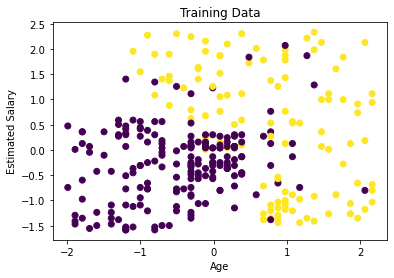

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()


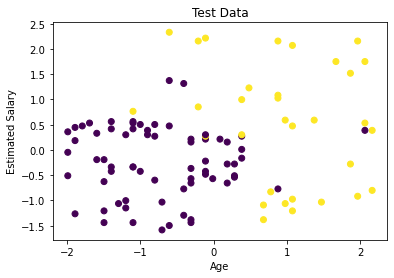

In [17]:
import matplotlib.pyplot as plt


plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Data')
plt.show()


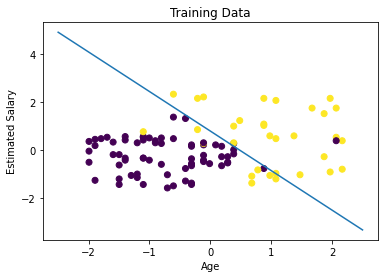

In [12]:
# Plot data points

plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)  


# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.plot(xx, yy)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show();

**Comparison of Kernel Performance**
If we compare the performance of the different types of kernels we can clearly see that all the kernels gave the same results that is 93 % accuracy. Since our data is non linear so applying the non linear kernels(Gaussian or RBF,Polynomial,Sigmoid) gives the better results (93%) as compaired to the linear kernel(90%).
So from the observations we can say that there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on the test dataset.